# 1.1 Import Data & required libraries

In [103]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing modeling libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


+ Import CSV data as pandas DataFrame 

In [104]:
df = pd.read_csv('data/stud.csv')

+ Show first rows

In [105]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


+ Label names are not in an easy format, reformat for ease of use in modeling 

In [106]:
df.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in df.columns] 

In [107]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dropping math score to predict it from other features

In [108]:
X = df.drop('math_score', axis=1)

In [109]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [110]:
y = df['math_score']

y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [111]:
# Assuming 'X' is your features DataFrame and 'y' is your target series

# Selecting numeric and categorical features
numeric_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# importing the necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Creating numeric & categorical transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Setting up the column transformer with named steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
    ]
)


In [112]:
# Fitting the preprocessor
X = preprocessor.fit_transform(X)

In [113]:
X.shape

(1000, 19)

In [114]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

x_train.shape, x_test.shape

((750, 19), (250, 19))

## Creating an evaluation function  

In [115]:
def evaluate_model(true, pred):
    """
    Evaluates the model on different metrics.
    
    Parameters:
    true(array-like): array of true values
    predicted(array-like): array of predicted values
    
    Returns:
    tuple: tuple containing (MAE, MSE, RMSE, R2) score of the model
    
    """
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return (mae, mse, rmse, r2)

## Evaluate multiple regression models 

In [116]:
# Defining the models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# Initilize an empty dataframe to store the results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2"])

# Empty lists 
results_list = []
models_list = []
r2_list = []


for name, model in models.items():
    model.fit(x_train, y_train)
   
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluations
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_test, y_test_pred)
    
    # Append the model names to the empty list
    models_list.append(name)
    
    # Store the results
    results_list.append({
        "Models": name,
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Trian MAE": train_mae,
        "Train MSE": train_mse,
    })
# Create the list of dictionaries into a dataframe
results_df = pd.DataFrame(results_list)
    
# Display the results
print(results_df)

                  Models  Train RMSE  Train R2  Trian MAE  Train MSE
0       LinearRegression    5.482528  0.877824   4.337931  30.058115
1                  Lasso    6.654128  0.820028   5.221704  44.277425
2                  Ridge    5.478806  0.877990   4.335372  30.017316
3    K-Nearest Neighbors    7.115313  0.794216   5.517600  50.627680
4          Decision Tree    7.617349  0.764153   6.008000  58.024000
5  RandomForestRegressor    6.080817  0.849704   4.681153  36.976333
6           XGBRegressor    6.439534  0.831449   5.021596  41.467601
7      CatBoostRegressor    5.976235  0.854830   4.650802  35.715379
8      AdaBoostRegressor    6.281895  0.839600   4.929138  39.462205


## Results by R2 score 

In [117]:
# Append the r2 score to the empty list
r2_list.extend(results_df['Train R2'].tolist())

pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model', 'R2']).sort_values(by=['R2'], ascending=False)

,Model,R2
2,Ridge,0.877990
0,LinearRegression,0.877824
7,CatBoostRegressor,0.854830
5,RandomForestRegressor,0.849704
8,AdaBoostRegressor,0.839600
6,XGBRegressor,0.831449
1,Lasso,0.820028
3,K-Nearest Neighbors,0.794216
4,Decision Tree,0.764153


## Linear Regression

In [118]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy using Linear Regression: %.2f" %score)

Accuracy using Linear Regression: 87.78


## Actual values vs Predicted values

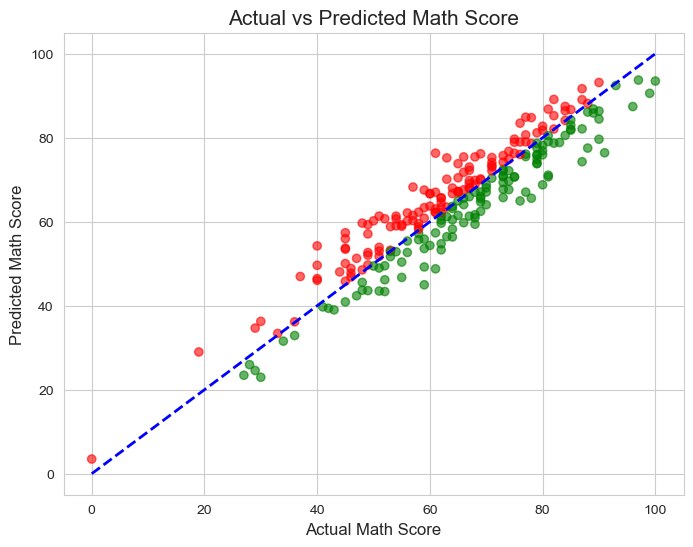

In [125]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Calculate errors (residuals) and color code by the magnitude of the error
errors = y_test - y_pred
colors = np.where(errors < 0, 'red', 'green')  # red if under-predicted, green if over-predicted

# Plot the residuals after fitting a linear model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c=colors)

# Adding a line of best fit
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2, linestyle='--')

# Labeling our axes
plt.xlabel("Actual Math Score", fontsize=12)
plt.ylabel("Predicted Math Score", fontsize=12)
plt.title("Actual vs Predicted Math Score", fontsize=15)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Regression Plot of Actual vs Predicted')

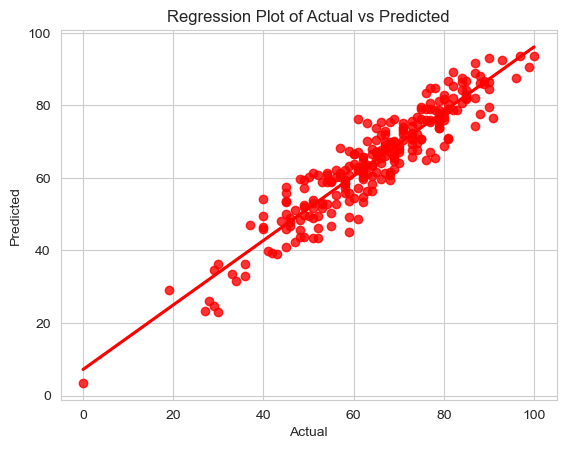

In [129]:
# Regression plot
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs Predicted')